<a href="https://colab.research.google.com/github/Null2648/google-colab/blob/main/15_Clustering_Hierarchical_Clustering(%EA%B3%84%EC%B8%B5%EC%A0%81_%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개념정리
 - 계층적 트리 뫃형을 이용해 개별 개체들을 순차적, 계층적으로 유사한 개체 내지 그룹과 통합하여 군집화를 수행하는 알고리즘
 - K-means 군집화와 달리 군집수를 사전에 정하지 않아도 됨(Dendrogram 이용)
 - 거리 또는 유사도를 기반으로 클러스터를 형성하는 알고리즘


## Agglomerative Method: 응집형 계층적 클러스터링
 - 각 데이터 지점에서 시작해서 유사한 지점들을 함께 결합해 클러스터를 형성(Bottom-Up 방식)
 - 연결 기준에 따라 군집이 달라지므로 데이터 특성, 분포에 따라 적절히 변경하며 확인해야 한다.
 - 연결기준(유클리디안 거리)
 1. single linkage: 두 클러스터 ㄴㅐ의 가장 가까운 점 사이의 거리
 - 먼 거리에 있는 이상한 데이터의 영향을 최소화 할 수 있다.
 2. complete linkage: 두 클러스터 내의 가장 먼 점 사이의 거리
 - 클러스터간 거리가 멀고 클러스터의 밀집도가 높을 경우 좋은 결과를 낸다.
 3. average linkage: 두 클러스터 내의 모든 점 사이의 평균 거리
 - 무난한 방법이나 데이터에 노이즈가 많고 중심점이 명확하지 않으면 잘 동작하지 않을 수 있다.

# 필수 라이브러리 로딩

In [ ]:
import numpy as np
import io
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family = 'malgun_gothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

sns.set_style('darkgrid')
plt.rc('figure', figsize=(10, 8))

warnings.filterwarnings('ignore')

# 데이터셋 로딩

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()

## 탐색적 데이터 분석: EDA

In [ ]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [ ]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## 데이터프레임으로 변형

In [ ]:
data = wine.data
label = wine.target
columns = wine.feature_names

df = pd.DataFrame(data, columns = columns)
print(df.shape)

(178, 13)


In [ ]:
df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0



## 덴드로그램 시각화
 - 적절한 k값을 찾는 방법 (k는 클러스터 수)

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
clusters_single = linkage(y = data, method = 'single', metric = 'euclidean')
clusters_average = linkage(y = data, method = 'average', metric = 'euclidean')
clusters_complete = linkage(y = data, method = 'complete', metric = 'euclidean')
# y 군집으로 들어올 피쳐값?

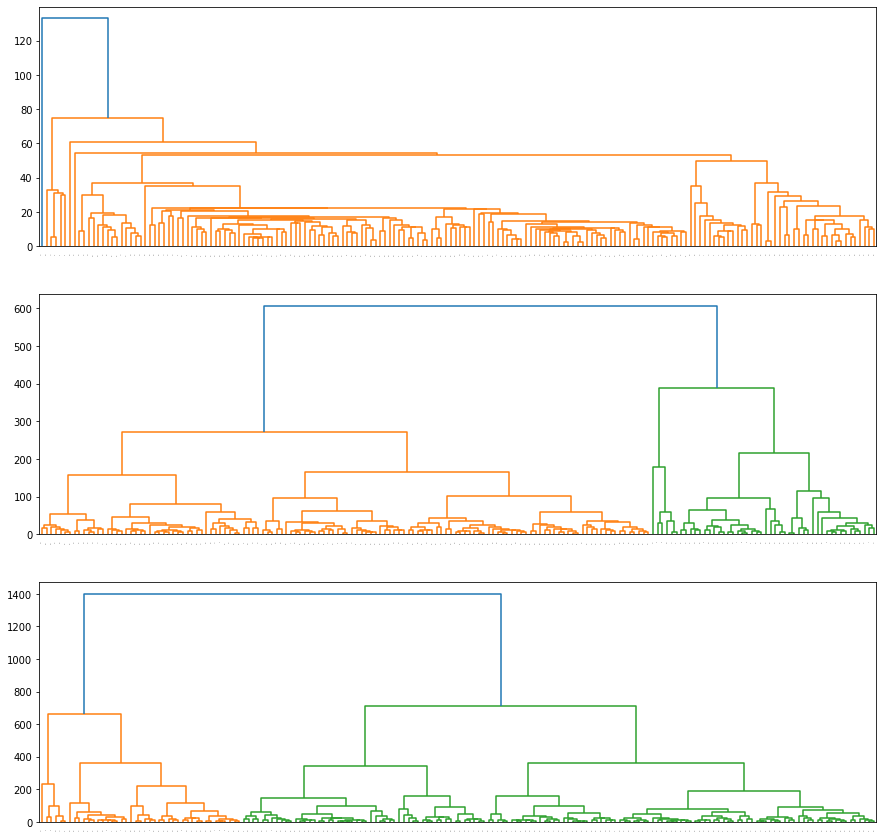

In [ ]:
fig, axes = plt.subplots(3, 1)
fig.set_size_inches(15, 15)

ax1 = dendrogram(clusters_single, leaf_font_size = 0, ax = axes[0])
ax2 = dendrogram(clusters_average, leaf_font_size = 0, ax = axes[1])
ax3 = dendrogram(clusters_complete, leaf_font_size = 0, ax = axes[2])

 - wine 데이터셋의 특성상 single linkage는 피해야 한다.
 - 군집의 수는 3또는 4개가 적당해 보인다.

## 데이터 전처리 - 피처 스케일링과 PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.loc[:, :] = scaler.fit_transform(data)
df.describe().loc[['mean', 'std']]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
mean,7.943708e-15,3.592632e-16,-4.066660e-15,-7.983626e-17,-7.983626e-17,-3.991813e-17,9.979533e-16,-5.588538e-16,-1.656602e-15,-3.442939e-16,1.636643e-15,2.235415e-15,-1.197544e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [ ]:
data = pca.fit_transform(data)
data.shape

(178, 2)

## Agglomerative Clustering - Single Linkage

In [ ]:
from sklearn.cluster import AgglomerativeClustering
single_clustering = AgglomerativeClustering(n_clusters=3, linkage = 'single')
single_clusters = single_clustering.fit_predict(data)
single_clusters[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
temp = pd.DataFrame(data, columns = ['pca1', 'pca2'])
temp['single'] = single_clusters

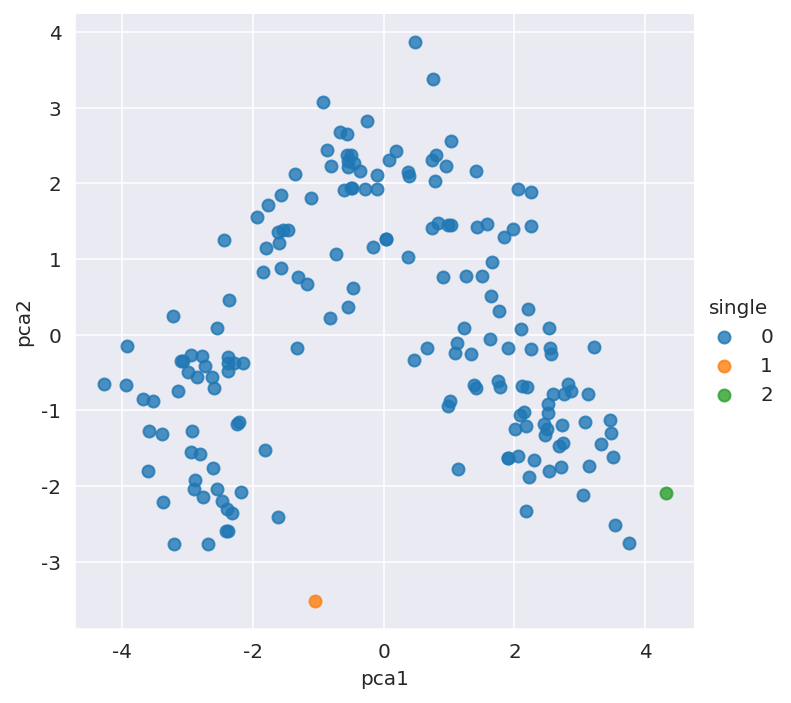

In [ ]:
sns.lmplot(x='pca1', y = 'pca2', data=temp, hue = 'single', fit_reg=False)

In [ ]:
single5_clustering = AgglomerativeClustering(n_clusters=5, linkage = 'single')
single5_clusters = single5_clustering.fit_predict(data)
temp['single5'] = single5_clusters

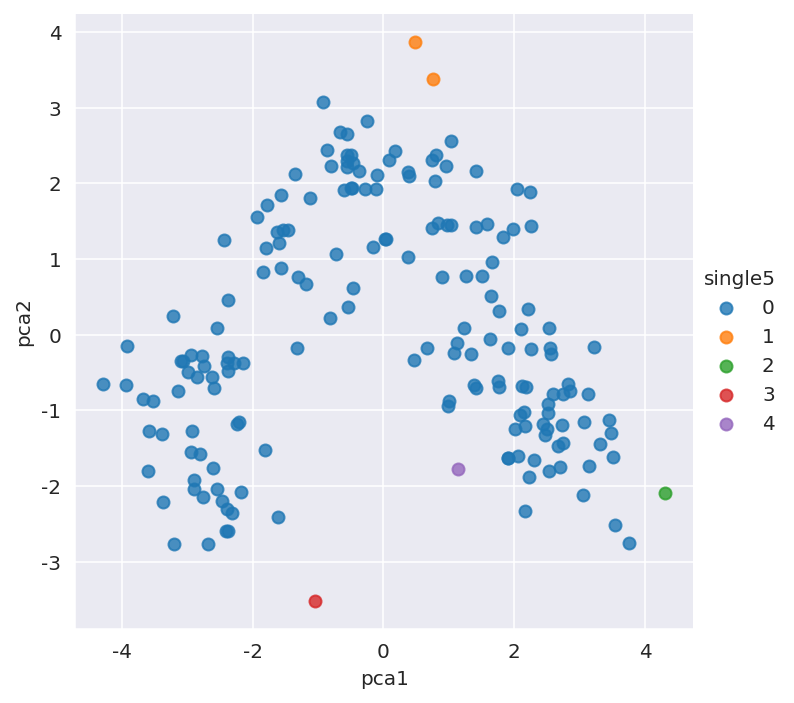

In [ ]:
sns.lmplot(x='pca1', y = 'pca2', data=temp, hue = 'single5', fit_reg=False)

## Agglomerative Clustering - Agerage Linkage

In [ ]:
average_clustering = AgglomerativeClustering(n_clusters=3, linkage = 'average')
average_clusters = average_clustering.fit_predict(data)
temp['average'] = average_clusters

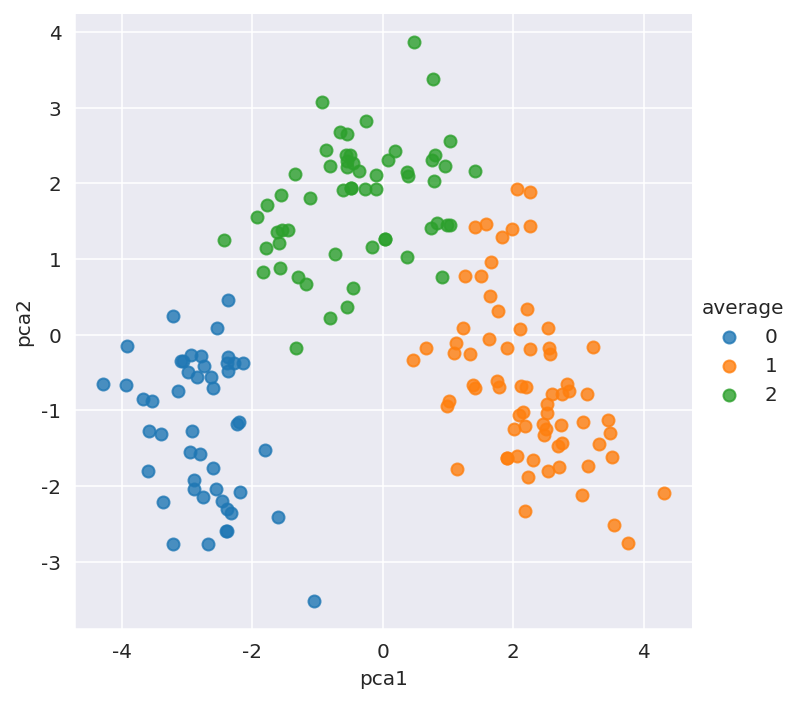

In [ ]:
sns.lmplot(x='pca1', y='pca2', data= temp, hue='average', fit_reg=False )

In [ ]:
average5_clustering = AgglomerativeClustering(n_clusters=5, linkage = 'average')
average5_clusters = average5_clustering.fit_predict(data)
temp['average5'] = average5_clusters

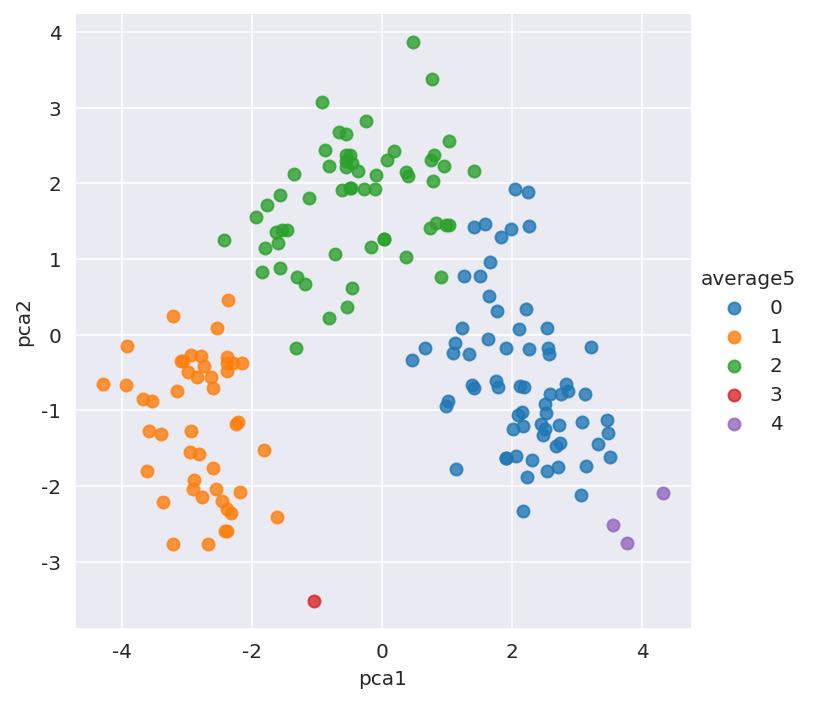

In [ ]:
sns.lmplot(x='pca1', y='pca2', data= temp, hue='average5', fit_reg=False )

## Agglomerative Clustering - Complete Linkage

In [ ]:
complete_clustering = AgglomerativeClustering(n_clusters=3, linkage = 'complete')
complete_clusters = complete_clustering.fit_predict(data)
temp['complete'] = complete_clusters

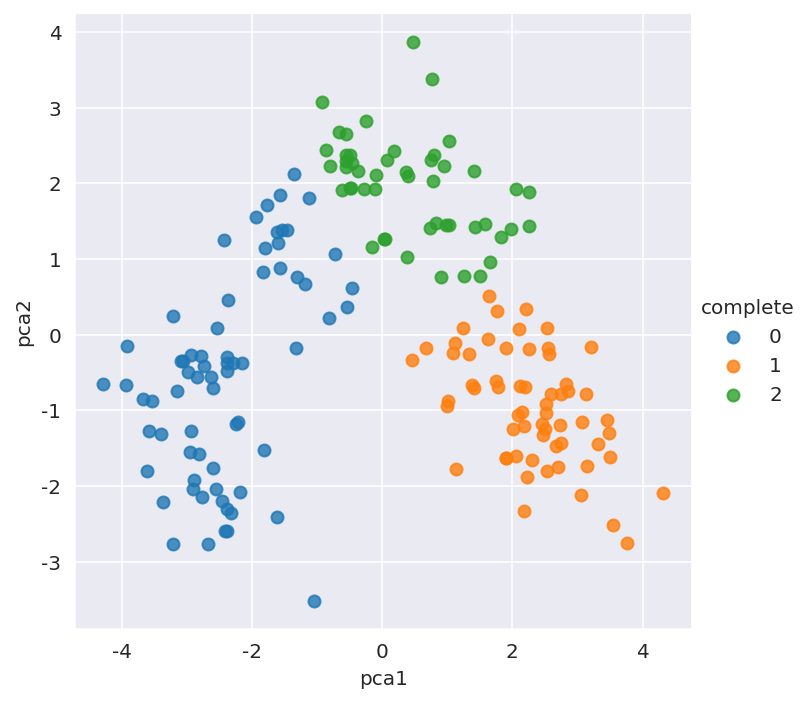

In [ ]:
sns.lmplot(x='pca1', y='pca2', data= temp, hue='complete', fit_reg=False )

In [ ]:
complete5_clustering = AgglomerativeClustering(n_clusters=5, linkage = 'complete')
complete5_clusters = complete5_clustering.fit_predict(data)
temp['complete5'] = complete5_clusters

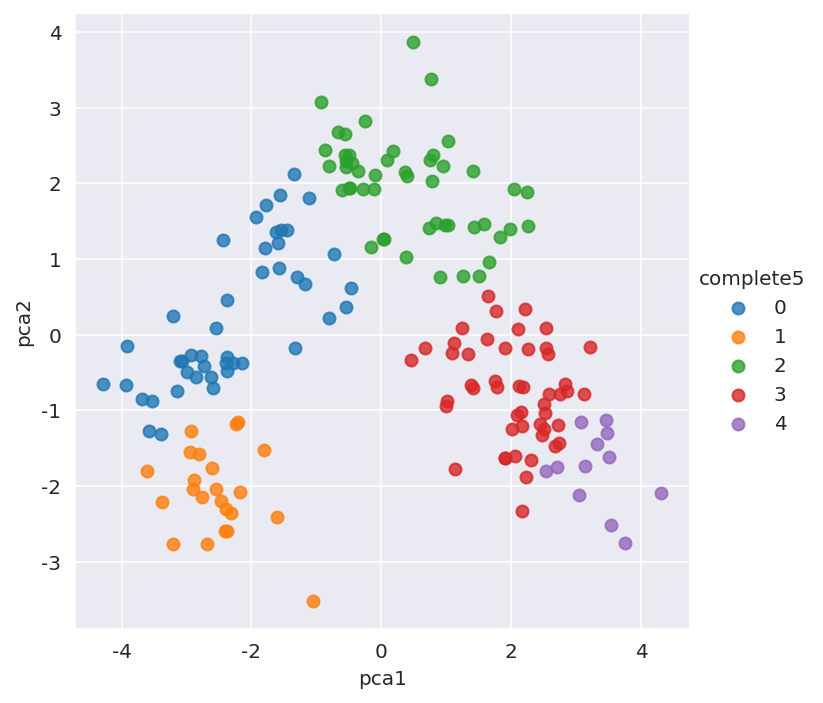

In [ ]:
sns.lmplot(x='pca1', y='pca2', data= temp, hue='complete5', fit_reg=False )